In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_no_duplicates=df.drop_duplicates()
df_no_duplicates

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='region', ylabel='charges'>

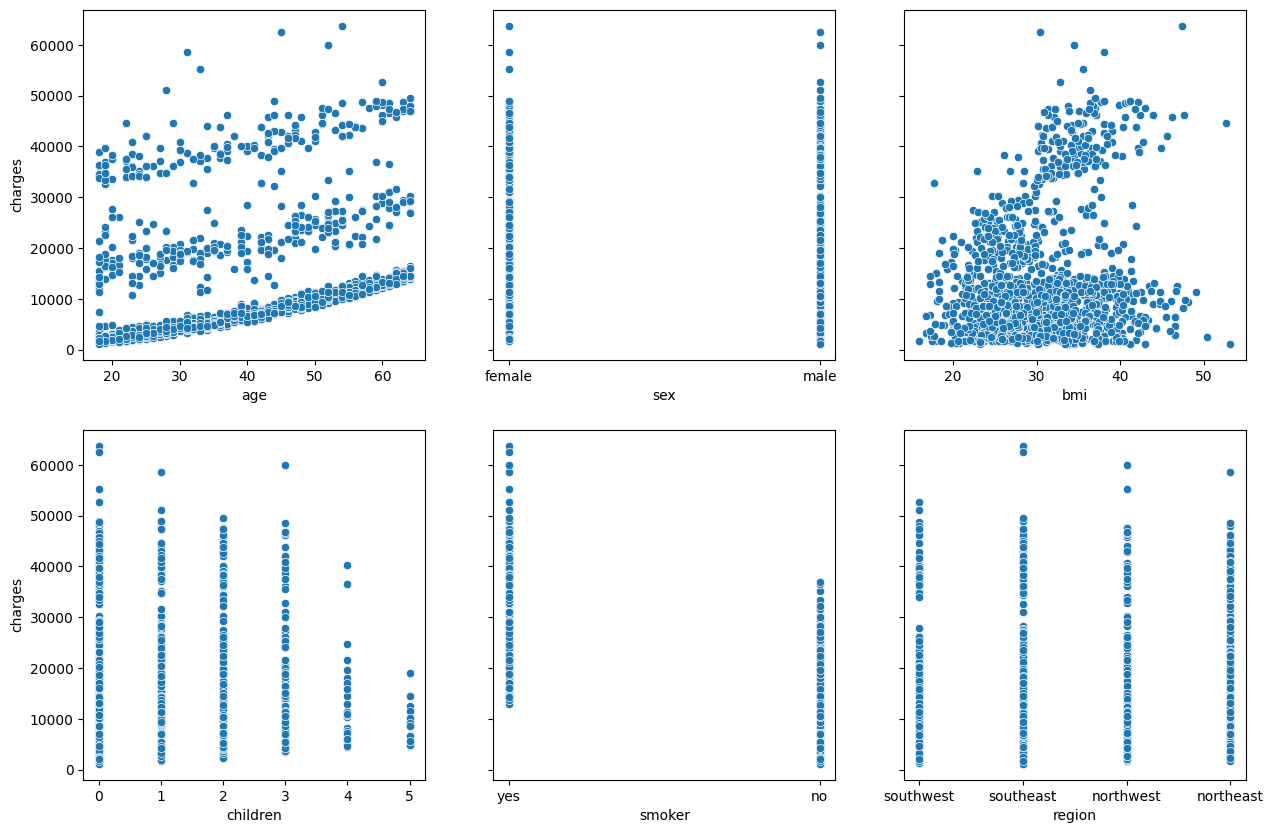

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(15,10),sharey=True)
sns.scatterplot(x='age',y='charges',data=df,ax=axes[0][0])
sns.scatterplot(x='sex',y='charges',data=df,ax=axes[0][1])
sns.scatterplot(x='bmi',y='charges',data=df,ax=axes[0][2])
sns.scatterplot(x='children',y='charges',data=df,ax=axes[1][0])
sns.scatterplot(x='smoker',y='charges',data=df,ax=axes[1][1])
sns.scatterplot(x='region',y='charges',data=df,ax=axes[1][2])

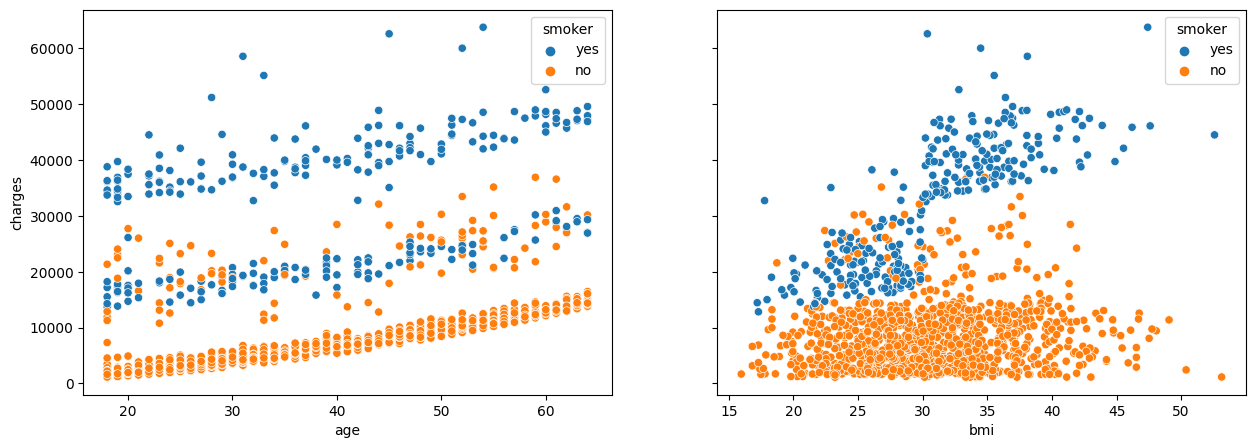

In [ ]:
fig,axes = plt.subplots(1,2, figsize = (15,5),sharey = True)
sns.scatterplot(x='age', y='charges', data=df, hue = 'smoker', ax=axes[0])
sns.scatterplot(x='bmi', y='charges', data=df, hue = 'smoker', ax=axes[1])
plt.show()

In [ ]:
data=pd.get_dummies(df,drop_first=True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [ ]:
df_corr = df.corr()
df_corr

<ipython-input-28-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


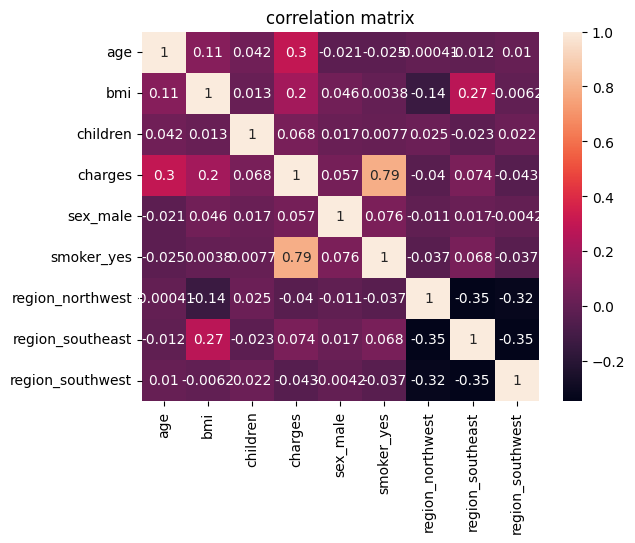

In [ ]:
correlation=data.corr()
sns.heatmap(correlation,annot=True)
plt.title('correlation matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
x1 = df[['age','sex','bmi','children','smoker','region']]
y = df['charges']
x = pd.get_dummies(x1,drop_first=True)

<function matplotlib.pyplot.show(close=None, block=None)>

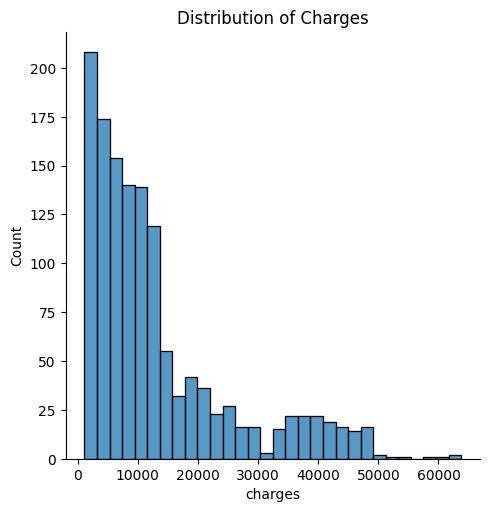

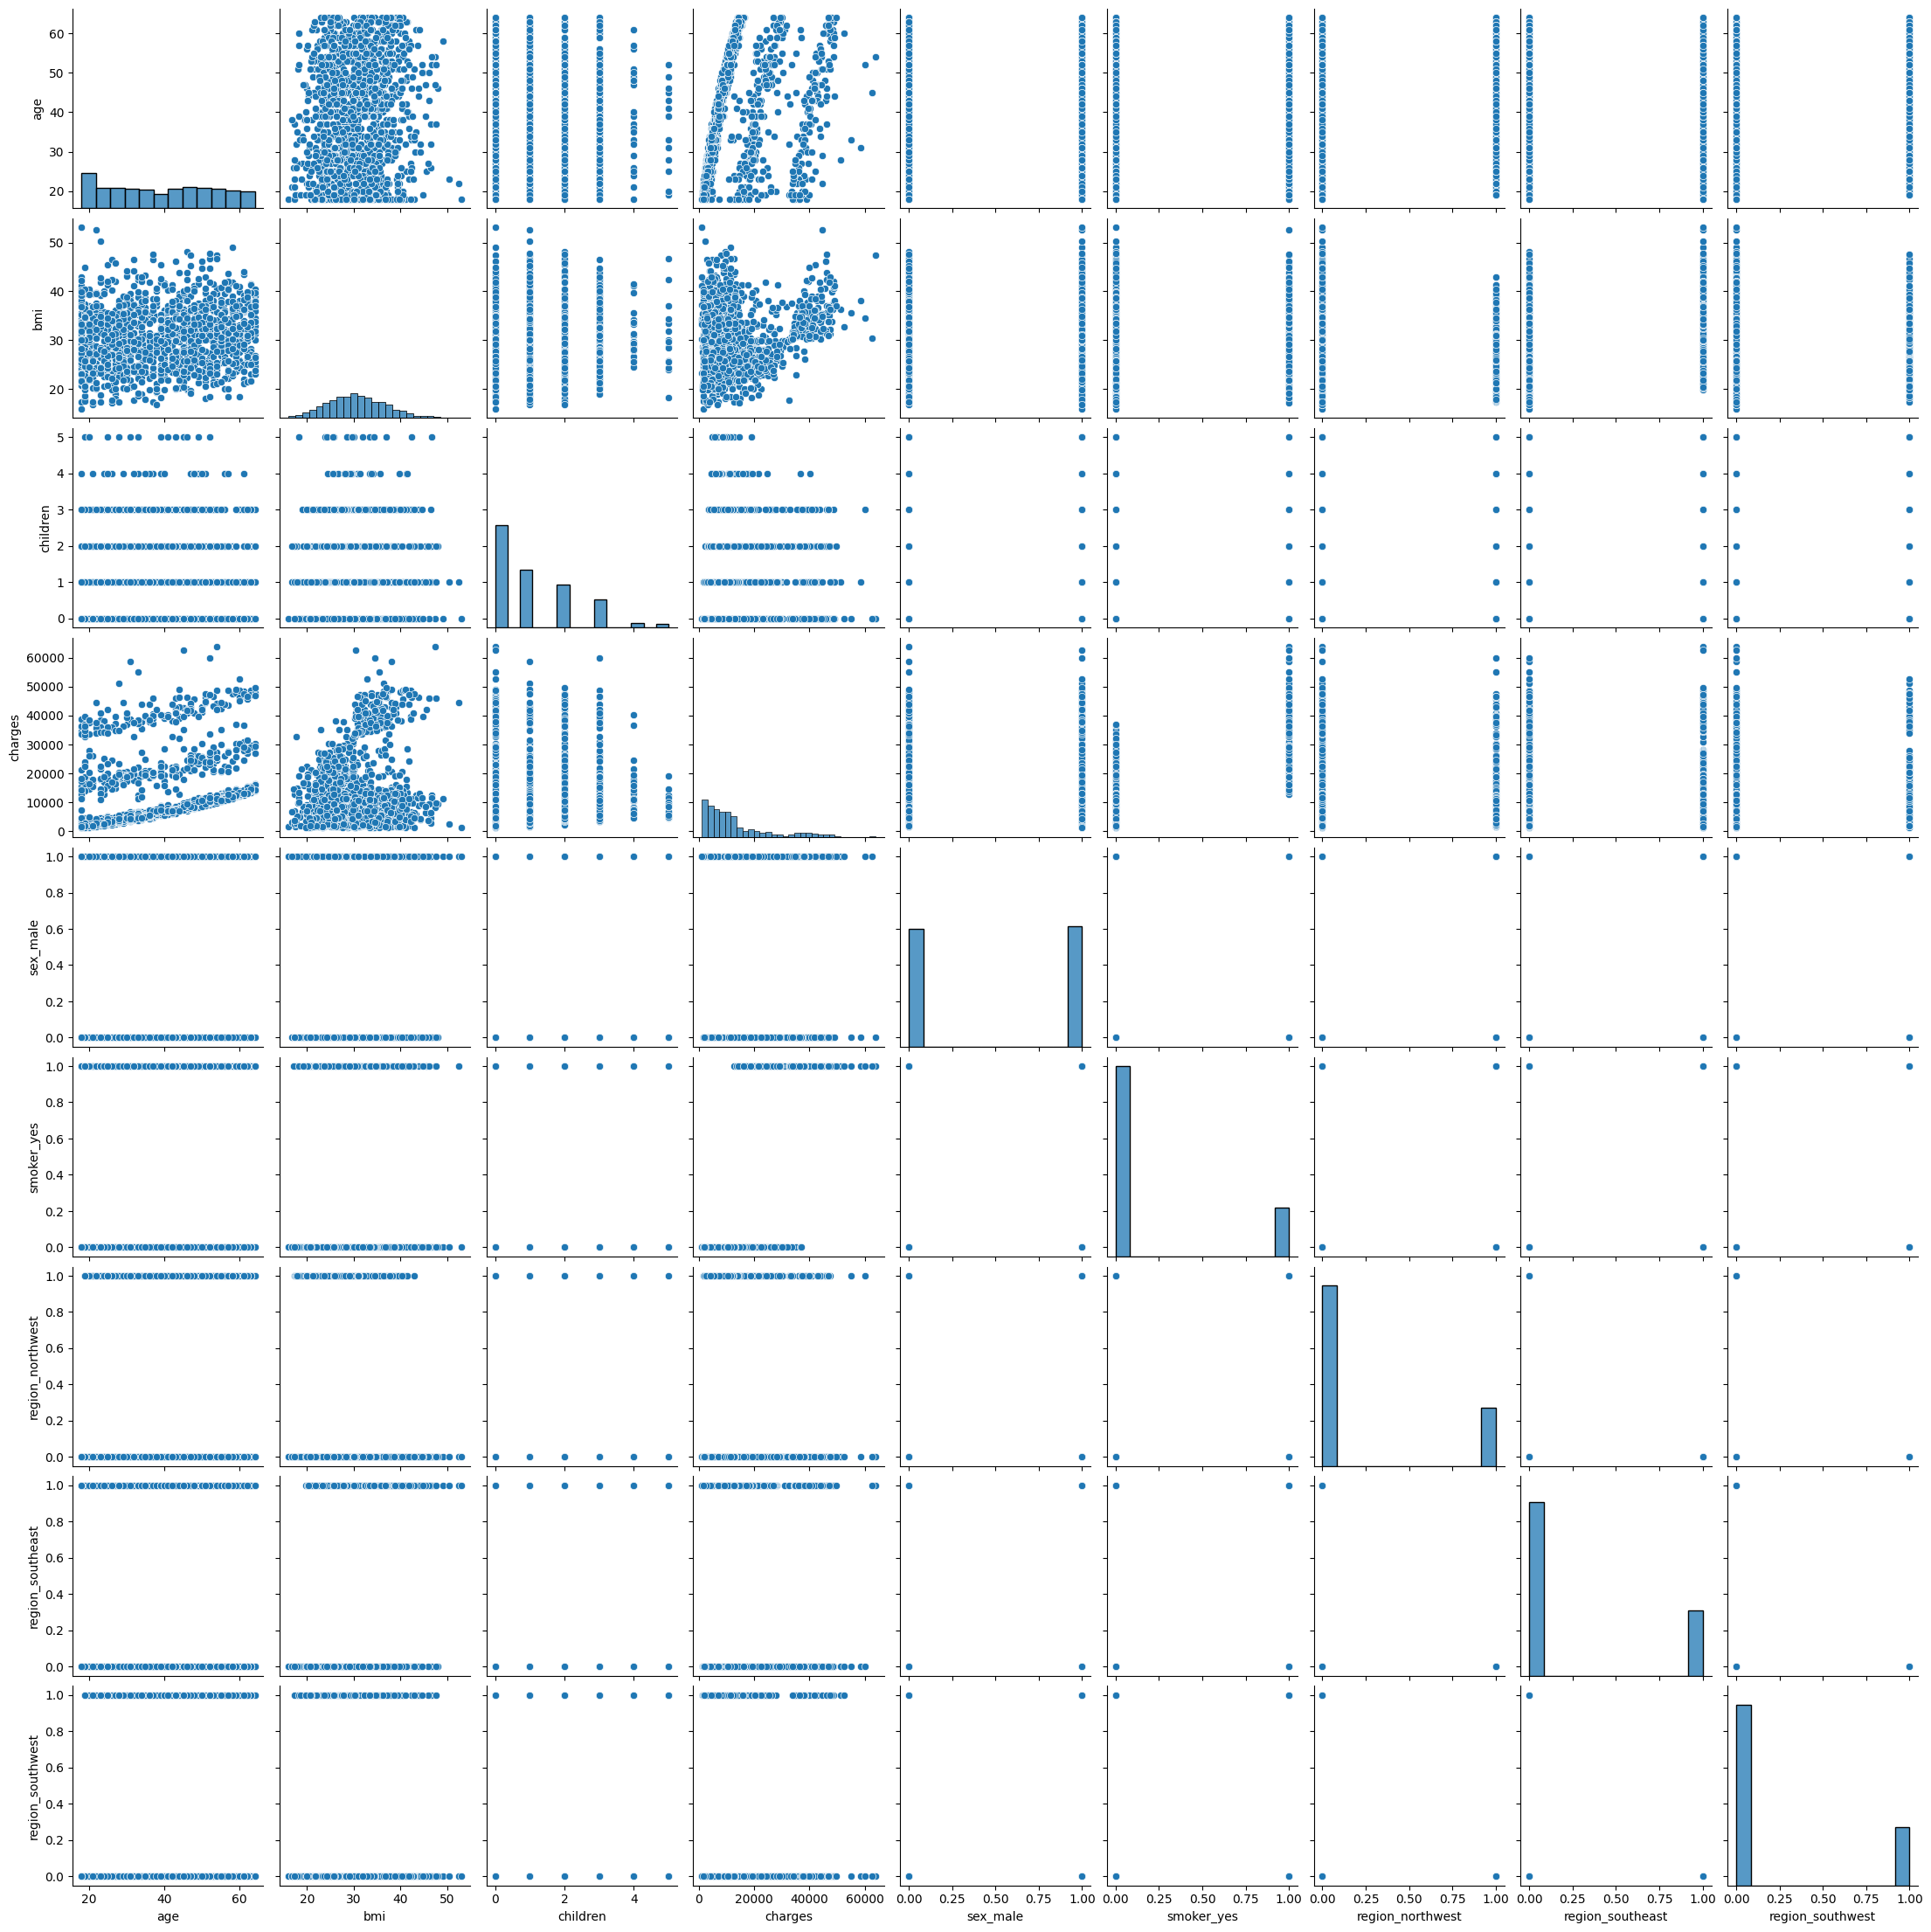

In [ ]:
sns.displot(data['charges'])
plt.title("Distribution of Charges")
sns.pairplot(data)
plt.show


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
r2

0.7835929767120724

In [ ]:
model.intercept_

-11931.21905032666

In [ ]:
model.coef_

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02, -1.85916916e+01,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

In [ ]:
def insurance_charge(age,bmi):
  charge=model.intercept_+model.coef_[0]*age + model.coef_[1]*bmi
  return charge

In [ ]:
age=int(input())
bmi=int(input())
charge=model.intercept_+model.coef_[0]*age + model.coef_[1]*bmi

27
28


## `OLS`

In [ ]:
import statsmodels.api as sm
x_train_ols=sm.add_constant(x_train)
result=sm.OLS(y_train,x_train_ols).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Wed, 27 Sep 2023   Prob (F-statistic):          1.32e-305
Time:                        06:20:46   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.193e+04   1114.505    -10.705      0.000   -1.41e+04   -9744.335
age                256.9757     13.477     19.067      0.000     230.530     283.421
bmi                337.0926     32.471     10.381      0.000     273.378     400.807
children           425.2788    154.655      2.750      0.006     121.814     728.743
sex_male           -18.5917    376.175     -0.049      0.961    -756.722     719.539
smoker_yes        2.365e+04    466.505     50.699      0.000    2.27e+04    2.46e+04
region_northwest  -370.6773    536.873     -0.690      0.490   -1424.130     682.776
region_southeast  -657.8643    539.791     -1.219      0.223   -1717.043     401.314
region_southwest  -809.7994    535.208     -1.513      0.131   -1859.986     240.387
==============================================================================
Omnibus:                      252.330   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.798
Skew:                           1.253   Prob(JB):                    5.19e-134
Kurtosis:                       5.737   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
inter,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8 = result.params
inter,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8

(-11931.219050326661,
 256.9757058311948,
 337.09255194877807,
 425.2787835242743,
 -18.591691641007856,
 23651.12885576124,
 -370.67732622781546,
 -657.8642965646468,
 -809.7993541824737)

In [ ]:
def insurance_charges(age,bmi,smoker):
  charges=inter + coef1*age +coef2*bmi + coef3*smoker
  return charges

In [ ]:
insurance_charges(25,27,0)

3594.6724980702165